# 분석 목표 : 인구 통계학적 자료에 따른 커피 취향 차이

In [2]:
!pip install kaggle --upgrade

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 664.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=d711e3367dcf436daa6aeb6f3b0114da1d0db6bcf2746f5c2f2fe31b0ee8eddd
  Stored in directory: c:\users\a\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [5]:
pip install kagglehub

   ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/43.0 kB ? eta -:--:--
   ---------------------------------------- 43.0/43.0 kB 697.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datalab351/great-american-coffee-taste-test")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 495k/495k [00:00<00:00, 732kB/s]

Extracting files...
Path to dataset files: C:\Users\a\.cache\kagglehub\datasets\datalab351\great-american-coffee-taste-test\versions\1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
data_file = os.path.join(path, 'GACTT_RESULTS_ANONYMIZED.csv')
df = pd.read_csv(data_file)
df.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What else do you add to your coffee?,What kind of dairy do you add?,What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add?,What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee A - Notes,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [10]:
df.describe()

,What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3938.000000,3798.000000,3779.000000,3789.000000,3780.000000,3767.000000,3773.000000,3764.000000,3751.000000,3766.000000,3767.000000,3765.000000,3764.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.693499,2.141127,3.634824,3.310900,3.013228,2.223786,3.068646,3.071998,2.366836,3.064790,2.162729,3.858167,3.375930
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.948867,0.947163,0.982113,1.185953,0.992875,0.865389,1.113546,0.999267,0.921048,1.128431,1.081546,1.007973,1.452504
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 전처리 1) 결측치 확인 및 처리

In [11]:
df.isna().sum()

Submission ID                                                                                          0
Respondent ID                                                                                          0
Submitted at                                                                                           0
What is your age?                                                                                     31
What is your ZIP code?                                                                                78
How many cups of coffee do you typically drink per day?                                               93
Where do you typically drink coffee?                                                                  70
Where do you typically drink coffee? (At home)                                                        67
Where do you typically drink coffee? (At the office)                                                  67
Where do you typically drink coffee? (On the go)       

In [12]:
df.columns

Index(['Submission ID', 'Respondent ID', 'Submitted at', 'What is your age?',
       'What is your ZIP code?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       ...
       'Gender', 'Gender (please specify)', 'Marital Status',
       'Household Income', 'Education Level', 'Ethnicity/Race',
       'Ethnicity/Race (please specify)', 'Employment Status',
       'Number of Children', 'Political Affiliation'],
      dtype='object', length=118)

In [13]:
# 필요 없다고 판단되는 컬럼 1차 삭제
df.drop(columns=['Submission ID', 'Respondent ID', 'Submitted at',
                            'What is your ZIP code?','How many cups of coffee do you typically drink per day?',
                            'Where do you typically drink coffee?','How do you brew coffee at home?',
                            'How else do you brew coffee at home?', 'On the go, where do you typically purchase coffee?',
                            'Where else do you purchase coffee?', 'Please specify what your favorite coffee drink is',
                            'Do you usually add anything to your coffee?', 'What else do you add to your coffee?',
                            'What kind of dairy do you add?', 'What kind of sugar or sweetener do you add?',
                            'Lastly, how would you rate your own coffee expertise?', 'Coffee A - Bitterness',
                            'Coffee A - Acidity','Coffee A - Notes','Coffee B - Bitterness','Coffee B - Acidity',
                            'Coffee B - Notes', 'Coffee C - Bitterness', 'Coffee C - Acidity', 'Coffee C - Notes',
                            'Coffee D - Bitterness', 'Coffee D - Acidity' ,'Coffee D - Notes', 'Why do you drink coffee?',
                            'Other reason for drinking coffee',"What is the most you've ever paid for a cup of coffee?",
                            "What is the most you'd ever be willing to pay for a cup of coffee?",
                            "Approximately how much have you spent on coffee equipment in the past 5 years?", 'Gender (please specify)',
                            'Marital Status','Ethnicity/Race (please specify)', 'Number of Children', 'Political Affiliation'], inplace=True)

# 전부 null인 컬럼들도 삭제
for i in df.columns:
    if df[i].isna().sum() == 4042:
        df.drop(i, axis=1, inplace=True)

df.head()

,What is your age?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),"On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",What is your favorite coffee drink?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Do you like the taste of coffee?,Do you know where your coffee comes from?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Household Income,Education Level,Ethnicity/Race,Employment Status
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
df.dtypes

What is your age?                                                                                    object
Where do you typically drink coffee? (At home)                                                       object
Where do you typically drink coffee? (At the office)                                                 object
Where do you typically drink coffee? (On the go)                                                     object
Where do you typically drink coffee? (At a cafe)                                                     object
Where do you typically drink coffee? (None of these)                                                 object
How do you brew coffee at home? (Pour over)                                                          object
How do you brew coffee at home? (French press)                                                       object
How do you brew coffee at home? (Espresso)                                                           object
How do you brew coffee at ho

In [15]:
# T/F 문항들은 특정 질문에 해당될 시에만 True인 질문들만 남겨놔서 결측치 모두 0으로 대체할 수 있다고 판단
df.fillna(0, inplace=True)
df.isna().sum()

What is your age?                                                                                   0
Where do you typically drink coffee? (At home)                                                      0
Where do you typically drink coffee? (At the office)                                                0
Where do you typically drink coffee? (On the go)                                                    0
Where do you typically drink coffee? (At a cafe)                                                    0
Where do you typically drink coffee? (None of these)                                                0
How do you brew coffee at home? (Pour over)                                                         0
How do you brew coffee at home? (French press)                                                      0
How do you brew coffee at home? (Espresso)                                                          0
How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))        

# 전처리 2) 범주형 데이터 응답 처리

In [16]:
# BOOL 응답 처리
df.replace({False: 0, True: 1},inplace = True)
df.head()

C:\Users\a\AppData\Local\Temp\ipykernel_24776\3655957809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1},inplace = True)


,What is your age?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),"On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",What is your favorite coffee drink?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Do you like the taste of coffee?,Do you know where your coffee comes from?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Household Income,Education Level,Ethnicity/Race,Employment Status
0,18-24 years old,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Regular drip coffee,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Complex,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25-34 years old,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Iced coffee,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
# 범주형 응답 처리
df['What is your age?'].replace({'<18 years old': 1, '18-24 years old': 2, '25-34 years old': 3, '35-44 years old': 4, '45-54 years old': 5, '55-64 years old': 6, '>65 years old': 7},inplace = True)
df['How strong do you like your coffee?'].replace({'Weak' : 1, 'Somewhat light' : 2, 'Medium' : 3, 'Somewhat strong': 4, 'Very strong': 5},inplace = True)
df['How much caffeine do you like in your coffee?'].replace({'Decaf' :1, 'Half caff': 2, 'Full caffeine': 3},inplace = True)
df['In total, much money do you typically spend on coffee in a month?'].replace({'<$20': 1, '$20-$40': 2, '$40-$60': 3, '$60-$80': 4, '$80-$100': 5, '>$100': 6},inplace = True)
df['Do you like the taste of coffee?'].replace({'No': 0, 'Yes':1},inplace = True)
df['Do you know where your coffee comes from?'].replace({'No': 0, 'Yes':1},inplace = True)
df['Do you feel like you’re getting good value for your money when you buy coffee at a cafe?'].replace({'No': 0, 'Yes':1},inplace = True)
df['Do you feel like you’re getting good value for your money with regards to your coffee equipment?'].replace({'No': 0, 'Yes':1},inplace = True)
df['Household Income'].replace({'Under $25,000': 1, '$25,000 - $49,999': 2, '$50,000 - $74,999': 3, '$75,000 - $99,999': 4, '$100,000 - $149,999': 5, '$150,000 or more': 6},inplace = True)
df['Education Level'].replace({'Less than high school': 1, 'High school graduate': 2, "Some college or associate's degree": 3, "Bachelor's degree": 4, "Master's degree": 5, 'Doctorate or professional degree': 6},inplace = True)

df.head()

C:\Users\a\AppData\Local\Temp\ipykernel_24776\3932410372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What is your age?'].replace({'<18 years old': 1, '18-24 years old': 2, '25-34 years old': 3, '35-44 years old': 4, '45-54 years old': 5, '55-64 years old': 6, '>65 years old': 7},inplace = True)
C:\Users\a\AppData\Local\Temp\ipykernel_24776\3932410372.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

,What is your age?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),"On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",What is your favorite coffee drink?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Do you like the taste of coffee?,Do you know where your coffee comes from?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Household Income,Education Level,Ethnicity/Race,Employment Status
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Regular drip coffee,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Complex,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Iced coffee,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Light,0,0,0,0.0,0.0,0.0,0.0,

In [18]:
ddf = pd.get_dummies(df, columns=['What is your favorite coffee drink?',"Before today's tasting, which of the following best described what kind of coffee you like?",
                  'What roast level of coffee do you prefer?','Between Coffee A, Coffee B, and Coffee C which did you prefer?','Between Coffee A and Coffee D, which did you prefer?',
                  'Lastly, what was your favorite overall coffee?','Do you work from home or in person?','Gender',
                  'Ethnicity/Race','Employment Status'], dtype=float)

ddf.head()

,What is your age?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),"On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),How strong do you like your coffee?,How much caffeine do you like in your coffee?,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Do you like the taste of coffee?,Do you know where your coffee comes from?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Household Income,Education Level,What is your favorite coffee drink?_0,What is your favorite coffee drink?_Americano,What is your favorite coffee drink?_Blended drink (e.g. Frappuccino),What is your favorite coffee drink?_Cappuccino,What is your favorite coffee drink?_Cold brew,What is your favorite coffee drink?_Cortado,What is your favorite coffee drink?_Espresso,What is your favorite coffee drink?_Iced coffee,What is your favorite coffee drink?_Latte,What is your favorite coffee drink?_Mocha,What is your favorite coffee drink?_Other,What is your favorite coffee drink?_Pourover,What is your favorite coffee drink?_Regular drip coffee,"Before today's tasting, which of the following best described what kind of coffee you like?_0","Before today's tas

In [19]:
ddf.dtypes

What is your age?                                                                                            int64
Where do you typically drink coffee? (At home)                                                               int64
Where do you typically drink coffee? (At the office)                                                         int64
Where do you typically drink coffee? (On the go)                                                             int64
Where do you typically drink coffee? (At a cafe)                                                             int64
Where do you typically drink coffee? (None of these)                                                         int64
How do you brew coffee at home? (Pour over)                                                                  int64
How do you brew coffee at home? (French press)                                                               int64
How do you brew coffee at home? (Espresso)                                      

In [20]:
drop = [col for col in ddf.columns if col.endswith('_0')]
ddf.drop(columns=drop, inplace=True)
ddf.columns

Index(['What is your age?', 'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home? (Pour over)',
       'How do you brew coffee at home? (French press)',
       'How do you brew coffee at home? (Espresso)',
       'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
       ...
       'Ethnicity/Race_Hispanic/Latino',
       'Ethnicity/Race_Native American/Alaska Native',
       'Ethnicity/Race_Other (please specify)',
       'Ethnicity/Race_White/Caucasian',
       'Employment Status_Employed full-time',
       'Employment Status_Employed part-time', 'Employment Status_Homemaker',
       'Employment Status_Retired', 'Employment Status_Student',
       'Employment Status_Unemployed'],
   

In [21]:
ddf.head()

,What is your age?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),"On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),How strong do you like your coffee?,How much caffeine do you like in your coffee?,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Do you like the taste of coffee?,Do you know where your coffee comes from?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Household Income,Education Level,What is your favorite coffee drink?_Americano,What is your favorite coffee drink?_Blended drink (e.g. Frappuccino),What is your favorite coffee drink?_Cappuccino,What is your favorite coffee drink?_Cold brew,What is your favorite coffee drink?_Cortado,What is your favorite coffee drink?_Espresso,What is your favorite coffee drink?_Iced coffee,What is your favorite coffee drink?_Latte,What is your favorite coffee drink?_Mocha,What is your favorite coffee drink?_Other,What is your favorite coffee drink?_Pourover,What is your favorite coffee drink?_Regular drip coffee,"Before today's tasting, which of the following best described what kind of coffee you like?_Bold","Before today's tasting, which of the following best d

# 전처리 3) 로지스틱 회귀분석

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# 독립변수와 종속변수 분리
X = ddf[['What is your age?','Household Income','Education Level','Do you work from home or in person?_I do a mix of both',
        'Do you work from home or in person?_I primarily work from home','Do you work from home or in person?_I primarily work in person',
        'Gender_Female','Gender_Male','Gender_Non-binary','Gender_Other (please specify)','Gender_Prefer not to say',
        'Ethnicity/Race_Asian/Pacific Islander','Ethnicity/Race_Black/African American','Ethnicity/Race_Hispanic/Latino','Ethnicity/Race_Native American/Alaska Native',
        'Ethnicity/Race_Other (please specify)','Ethnicity/Race_White/Caucasian','Employment Status_Employed full-time','Employment Status_Employed part-time',
        'Employment Status_Homemaker','Employment Status_Retired','Employment Status_Student','Employment Status_Unemployed']]
y = ddf['Lastly, what was your favorite overall coffee?_Coffee A']

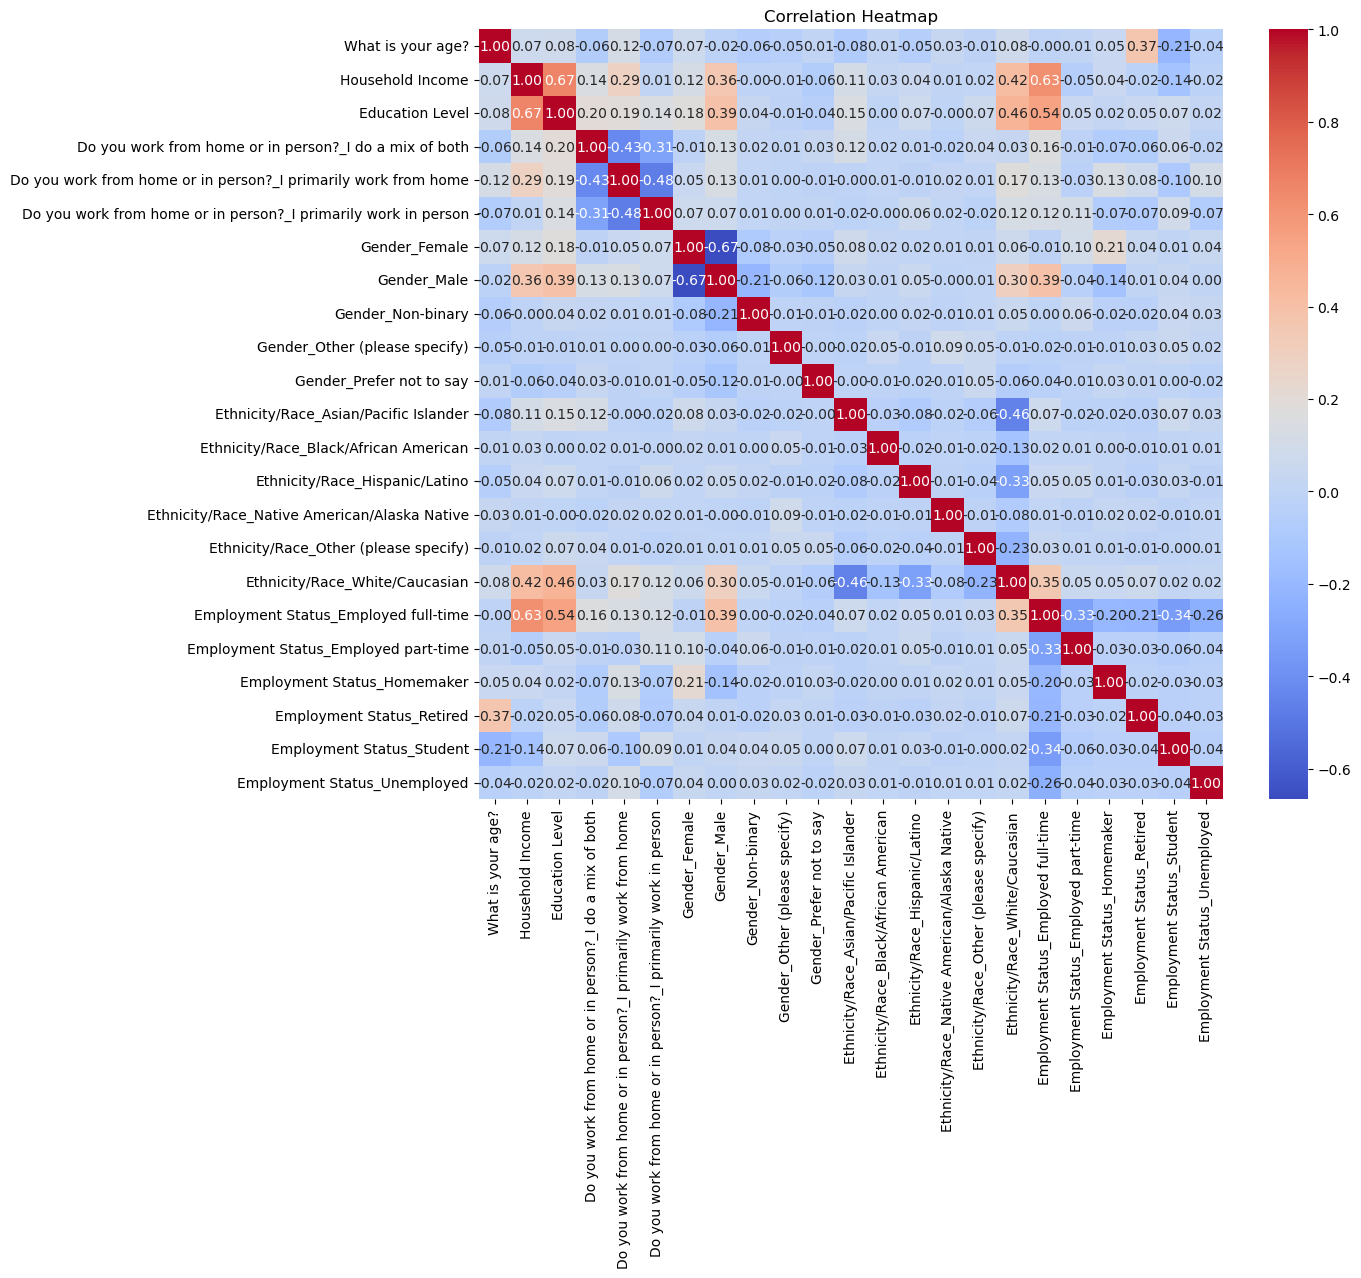

In [24]:
# X 상관관계
correlation_matrix = X.corr()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# train / test 분리
X_train ,X_test , y_train , y_test = train_test_split(X , y, test_size= 0.2 , random_state= 100)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train , y_train)

# 예측
y_pred = model.predict(X_test)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.799752781211372

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       647
         1.0       0.00      0.00      0.00       162

    accuracy                           0.80       809
   macro avg       0.40      0.50      0.44       809
weighted avg       0.64      0.80      0.71       809



C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# 독립변수와 종속변수 분리
X = ddf[['What is your age?','Household Income','Education Level','Do you work from home or in person?_I do a mix of both',
        'Do you work from home or in person?_I primarily work from home','Do you work from home or in person?_I primarily work in person',
        'Gender_Female','Gender_Male','Gender_Non-binary','Gender_Other (please specify)','Gender_Prefer not to say',
        'Ethnicity/Race_Asian/Pacific Islander','Ethnicity/Race_Black/African American','Ethnicity/Race_Hispanic/Latino','Ethnicity/Race_Native American/Alaska Native',
        'Ethnicity/Race_Other (please specify)','Ethnicity/Race_White/Caucasian','Employment Status_Employed full-time','Employment Status_Employed part-time',
        'Employment Status_Homemaker','Employment Status_Retired','Employment Status_Student','Employment Status_Unemployed']]
y = ddf['Lastly, what was your favorite overall coffee?_Coffee B']

# train / test 분리
X_train ,X_test , y_train , y_test = train_test_split(X , y, test_size= 0.2 , random_state= 100)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train , y_train)

# 예측
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.799752781211372

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       646
         1.0       0.67      0.01      0.02       163

    accuracy                           0.80       809
   macro avg       0.73      0.51      0.46       809
weighted avg       0.77      0.80      0.71       809



In [28]:
# 독립변수와 종속변수 분리
X = ddf[['What is your age?','Household Income','Education Level','Do you work from home or in person?_I do a mix of both',
        'Do you work from home or in person?_I primarily work from home','Do you work from home or in person?_I primarily work in person',
        'Gender_Female','Gender_Male','Gender_Non-binary','Gender_Other (please specify)','Gender_Prefer not to say',
        'Ethnicity/Race_Asian/Pacific Islander','Ethnicity/Race_Black/African American','Ethnicity/Race_Hispanic/Latino','Ethnicity/Race_Native American/Alaska Native',
        'Ethnicity/Race_Other (please specify)','Ethnicity/Race_White/Caucasian','Employment Status_Employed full-time','Employment Status_Employed part-time',
        'Employment Status_Homemaker','Employment Status_Retired','Employment Status_Student','Employment Status_Unemployed']]
y = ddf['Lastly, what was your favorite overall coffee?_Coffee C']

# train / test 분리
X_train ,X_test , y_train , y_test = train_test_split(X , y, test_size= 0.2 , random_state= 100)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train , y_train)

# 예측
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7935723114956736

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       642
         1.0       0.00      0.00      0.00       167

    accuracy                           0.79       809
   macro avg       0.40      0.50      0.44       809
weighted avg       0.63      0.79      0.70       809



C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# 독립변수와 종속변수 분리
X = ddf[['What is your age?','Household Income','Education Level','Do you work from home or in person?_I do a mix of both',
        'Do you work from home or in person?_I primarily work from home','Do you work from home or in person?_I primarily work in person',
        'Gender_Female','Gender_Male','Gender_Non-binary','Gender_Other (please specify)','Gender_Prefer not to say',
        'Ethnicity/Race_Asian/Pacific Islander','Ethnicity/Race_Black/African American','Ethnicity/Race_Hispanic/Latino','Ethnicity/Race_Native American/Alaska Native',
        'Ethnicity/Race_Other (please specify)','Ethnicity/Race_White/Caucasian','Employment Status_Employed full-time','Employment Status_Employed part-time',
        'Employment Status_Homemaker','Employment Status_Retired','Employment Status_Student','Employment Status_Unemployed']]
y = ddf['Lastly, what was your favorite overall coffee?_Coffee D']

# train / test 분리
X_train ,X_test , y_train , y_test = train_test_split(X , y, test_size= 0.2 , random_state= 100)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train , y_train)

# 예측
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6749072929542645

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.81       545
         1.0       0.67      0.01      0.01       264

    accuracy                           0.67       809
   macro avg       0.67      0.50      0.41       809
weighted avg       0.67      0.67      0.55       809



C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 좋아하는 커피에 대하여 A,B,C,D 로 각각 4개의 로지스틱 회귀를 돌려본 결과 A,C는 f1-score가 0이고, B,D는 f1-score가 0.02라 유의미한 결과가 나오지 않았다...

In [ ]:
ddf.to_csv('coffee_data.csv', index=False)

# Power BI 이미지

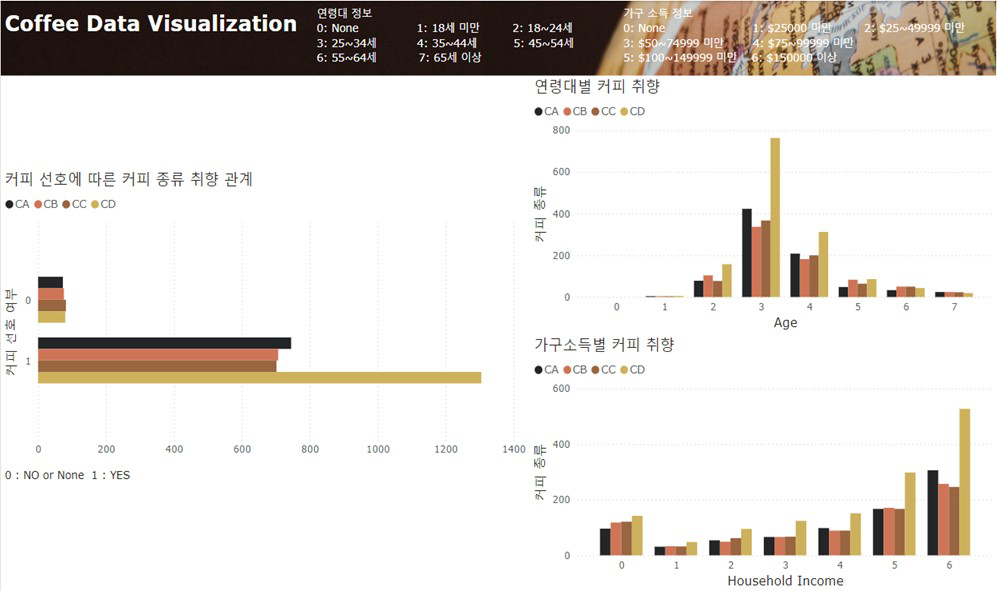

In [2]:
from PIL import Image

path = "C:/Users/a/Desktop/CDV.jpg"

img = Image.open(path)
img

# 데이터 분석

## 인구 통계학적 자료에 따른 커피 취향 차이를 알아보기 위하여 시각화 데이터를 우선 사용하였다.

### 1) 우선, 커피 선호 정도에 따라 어떤 종류의 커피를 좋아하는지 알아보기 위해 '커피 취향 여부' 변수와 커피 종류별 인코딩 변수를 가지고 가로 막대그래프를 그려보았다. 대부분이 커피를 선호한다고 하였고, 커피 D를 선호하는 사람이 가장 많았으며, 그 뒤로는 비슷한 수치이나, A>B>C 순으로 선호했다. 그래서, 사람들은 주로 과일향이 나는 커피를 선호한다는 것을 알 수 있다.


### 2) 다음으로 연령대별 커피 취향 파악을 위해 세로 막대그래프를 그려보았다. 거의 모든 연령대에서 커피 D를 가장 선호하였고, 2순위가 A이나, 45세 이상 중장년층의 범주부터는 B,C의 선호도가 높다는 것을 알 수 있다. 즉, 중장년층으로 갈수록 로스트의 정도가 강한 커피를 선호한다는 것을 알 수 있다.


### 3) 마지막으로 소득별 커피 취향을 파악하기 위해 세로 막대그래프를 그려보았다. 모든 소득 범주에서 거의 동일한 결과가 나왔는데, 커피 D를 선호하는 사람이 가장 많았으며, 나머지가 비슷한 수치였다. 소득이 높은 5,6 범주($100000 이상) 에서는 커피 D > 커피 A가 그나마 두드러지게 나타났다.


### 4) 시각화 데이터를 보아, D의 선호도가 가장 높고 그 이후로는 비슷하나, A가 2순위인 것으로 파악되는데, 그래서 로지스틱 회귀 분석 이전에 인구통계학적 자료에 대하여 D와 A의 선호도 예측 값이 높게 나올 것이라 생각했다. 그러나 A,D의 f1-score가 0이고, 오히려 B,C가 0.02가 나오게 되었다. B,C의 결과도 매우 낮은 값이기에 결론적으로 로지스틱 회귀로는 인구통계학적 자료에 따른 커피 취향 차이 예측은 전혀 유의미한 결과를 이끌어내지 못했다.(데이터 전처리에서 어디가 잘못된건지 모르겠습니다...)

